In [3]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Monthly, units, Daily, Stations, Normals
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt 
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid',font='Arial',font_scale=1.2)
rcParams['figure.figsize'] = 12,8
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
import scipy.stats as st
import time
import requests
from scipy.stats import linregress
from time import mktime
from pytz import utc, timezone
import webbrowser

In [33]:
# Vancouver annual mean data
# pollution data from 2020 to 2021

file = "co_df.csv"

# Read the  csv and store into Pandas DataFrame
co_df = pd.read_csv(file, encoding="utf-8")
co_df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-24 19:00:00,403.88,0.00,30.16,42.92,3.04,4.48,6.42,8.49
1,2020-11-24 20:00:00,407.22,0.01,29.13,36.12,3.58,4.61,7.04,9.75
2,2020-11-24 21:00:00,367.17,0.01,23.99,33.98,3.64,4.67,7.46,10.26
3,2020-11-24 22:00:00,313.76,0.01,18.85,33.26,3.31,4.75,7.70,10.26
4,2020-11-24 23:00:00,313.76,0.03,19.02,28.97,3.04,5.21,8.39,11.15
...,...,...,...,...,...,...,...,...,...
8831,2021-11-29 18:00:00,420.57,0.54,20.91,67.95,1.91,10.32,12.63,6.02
8832,2021-11-29 19:00:00,534.06,0.00,32.90,44.70,2.35,11.42,14.99,8.11
8833,2021-11-29 20:00:00,607.49,0.01,37.36,27.90,2.47,12.21,17.33,9.12
8834,2021-11-29 21:00:00,534.06,0.01,30.16,25.75,2.09,11.70,17.47,9.50


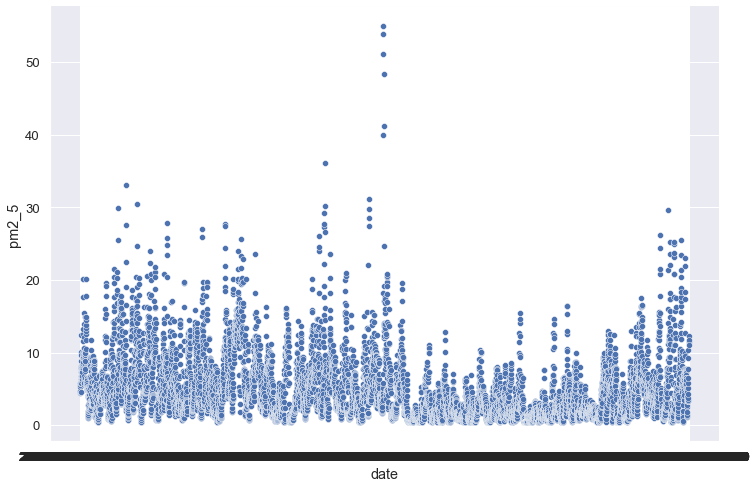

In [35]:
sns.scatterplot(x = "date", y = "pm2_5", data = co_df);

In [36]:
co_df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000,8836.000000
mean,269.912515,1.123479,7.474959,48.859516,1.617249,4.945980,6.537501,4.605754
std,122.907733,4.200860,9.627456,27.165849,1.376310,4.456578,5.545972,4.794619
min,133.510000,0.000000,0.340000,0.000000,0.120000,0.500000,0.540000,0.020000
25%,196.930000,0.000000,1.590000,27.540000,0.660000,1.750000,2.390000,1.330000
50%,233.650000,0.110000,3.940000,47.210000,1.210000,3.650000,4.960000,2.630000
75%,297.070000,0.330000,9.600000,68.670000,2.120000,6.780000,9.055000,6.225000
max,1441.960000,59.010000,101.450000,150.200000,11.680000,54.920000,58.510000,35.970000


In [4]:
# api_describey = ""
# lat = 21.8853
# lon = -102.2916
# start_w = 15629000
# end_w = 1638246029

In [5]:
# url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={start_w}&end={end_w}&appid={api_key}"
# response = requests.get(url).json()
# time.sleep(60)
# response.keys()

In [6]:
# co_df = pd.DataFrame(response["list"])
# co_df

In [7]:
# co = []
# no = []
# no2 = []
# o3 = []
# so2 = []
# pm2_5 = []
# pm10 = []
# nh3 = []
# dt = []

# # Counter
# counter = 0


# # For loop followed by try/except/continue
# for i in response:
#     try:
#         co.append(response["list"][0]["components"]["co"])
#         no.append(response["list"][0]["components"]["no"])
#         no2.append(response["list"][0]["components"]["no2"])
#         o3.append(response["list"][0]["components"]["o3"])
#         so2.append(response["list"][0]["components"]["so2"])
#         pm2_5.append(response["list"][0]["components"]["pm2_5"])
#         pm10.append(response["list"][0]["components"]["pm10"])
#         nh3.append(response["list"][0]["components"]["nh3"])
#         dt.append(response["list"][0]["components"]["dt"])
#         file_record = response["dt"]
#         print(f"Recorded {counter} | {file_record}")
        
#         counter += 1
#     except:
#         print("failed")

In [8]:
# Set time period
start = datetime(1970, 1, 1)
end = datetime(2021, 11, 20)
# start2 = datetime(2021, 11, 20)
# end2 = datetime(2021, 11, 28)

# Create Point for Vancouver, BC
vancouver = Point(49.2497, -123.1193, 70)
# lahore = Point(31.5204, 74.3587)
# aguascalientes = Point(21.8853, -102.2916)

# Get Monthly data for 
data = Monthly(vancouver, start, end)
data = data.convert(units.imperial)
data = data.fetch()

# data_pk = Monthly(lahore, start, end)
# data_pk = data_pk.convert(units.imperial)
# data = data.normalize
# data_pk = data_pk.fetch(1)

# data_mx = Monthly(aguascalientes, start, end)
# data_mx = data_mx.convert(units.imperial)
# data = data.normalize
# data_mx = data_mx.fetch(1)

# Plot line chart including average, minimum and maximum temperature
# data.plot(y=['tavg', 'tmin', 'tmax'])
# plt.show()
# avg_temp = df["tavg"]
# min_temp = df["tmin"]
# max_temp = df["tmax"]
# data_df = pd.DataFrame({
#     "Average Temp":[avg_temp],
#     "Minimum Temp":[min_temp],
#     "Maximum Temp":[max_temp]
# })
# data_df

In [10]:
data.keys()

Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')

In [11]:
# df_3 = pd.DataFrame(data_mx, columns=['tavg']).reset_index()
# df_3.info()

In [12]:
# df_2 = pd.DataFrame(data_pk, columns=['tavg']).reset_index()
# df_2.info()

In [13]:
df = pd.DataFrame(data, columns=['tavg']).reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    622 non-null    datetime64[ns]
 1   tavg    622 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.8 KB


In [17]:
def getMonths(input, m1, m2, m3):
    return input.loc[(input.time.dt.month==m1) | (input.time.dt.month==m2) | (input.time.dt.month==m3)]

In [19]:
winter_vc = getMonths(df,1,2,3)
spring_vc = getMonths(df,4,5,6)
summer_vc = getMonths(df,7,8,9)
fall_vc = getMonths(df,10,11,12)

In [20]:
# winter_pk = getMonths(df_2,12,1,2)
# spring_pk = getMonths(df_2,2,3,4)
# summer_pk = getMonths(df_2,4,5,6)
# monsoon_pk = getMonths(df_2,7,8,9)
# fall_pk = getMonths(df_2,9,10,11)

In [21]:
# winter_mx = getMonths(df_3,12,1,2)
# spring_mx = getMonths(df_3,3,4,5)
# summer_mx = getMonths(df_3,6,7,8)
# fall_mx = getMonths(df_3,9,10,11)

In [22]:
winter_vc_filled = winter_vc.fillna(winter_vc.mean())
spring_vc_filled = spring_vc.fillna(spring_vc.mean())
summer_vc_filled = summer_vc.fillna(summer_vc.mean())
fall_vc_filled = fall_vc.fillna(fall_vc.mean())

# winter_pk_filled = winter_pk.fillna(winter_pk.mean())
# spring_pk_filled = spring_pk.fillna(spring_pk.mean())
# summer_pk_filled = summer_pk.fillna(summer_pk.mean())
# monsoon_pk_filled = monsoon_pk.fillna(monsoon_pk.mean())
# fall_pk_filled = fall_pk.fillna(fall_pk.mean())

# winter_mx_filled = winter_mx.fillna(winter_mx.mean())
# spring_mx_filled = spring_mx.fillna(spring_mx.mean())
# summer_mx_filled = summer_mx.fillna(summer_mx.mean())
# fall_mx_filled = fall_mx.fillna(fall_mx.mean())

In [23]:
winter_vc_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 614
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    156 non-null    datetime64[ns]
 1   tavg    156 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.7 KB


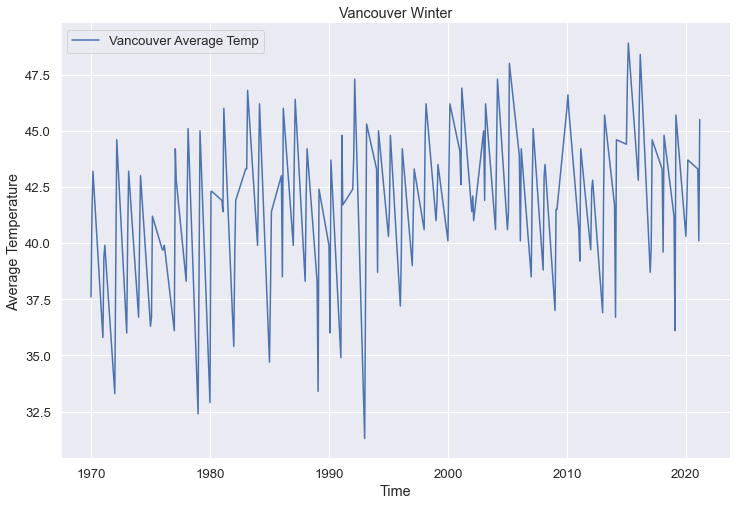

In [26]:
x = winter_vc_filled["time"]
y = winter_vc_filled["tavg"]
plt.xlabel("Time")
plt.ylabel("Average Temperature")
plt.plot(x,y);
# x = winter_pk_filled["time"]
# y = winter_pk_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.plot(x,y);
# x = winter_mx_filled["time"]
# y = winter_mx_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.title("Lahore vs Vancouver vs Aguascalientes Winter")
# plt.plot(x,y);
# plt.legend(['Vancouver, Canada','Lahore, Pakistan', "Aguascalientes, Mexico"]);

plt.title("Vancouver Winter")
plt.legend(['Vancouver Average Temp']);


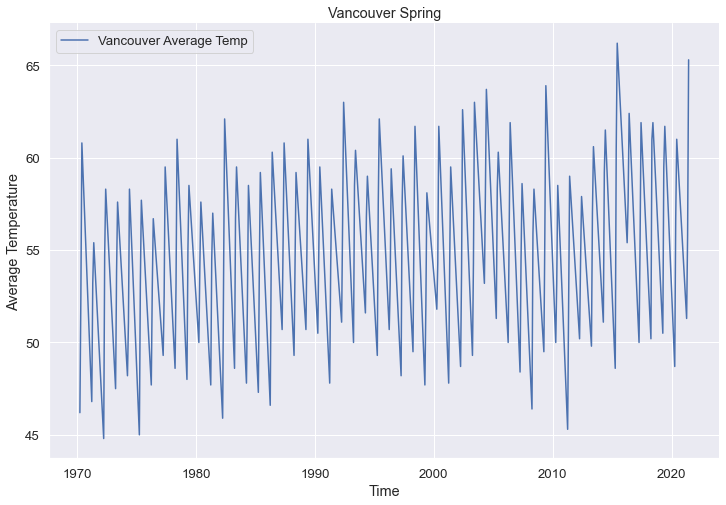

In [27]:
x = spring_vc_filled["time"]
y = spring_vc_filled["tavg"]
plt.xlabel("Time")
plt.ylabel("Average Temperature")
plt.plot(x,y);
# x = spring_pk_filled["time"]
# y = spring_pk_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.plot(x,y);
# x = spring_mx_filled["time"]
# y = spring_mx_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.title("Lahore vs Vancouver vs Aguascalientes Spring")
# plt.plot(x,y);
# plt.legend(['Vancouver, Canada','Lahore, Pakistan', "Aguascalientes, Mexico"]);

plt.title("Vancouver Spring")
plt.legend(['Vancouver Average Temp']);

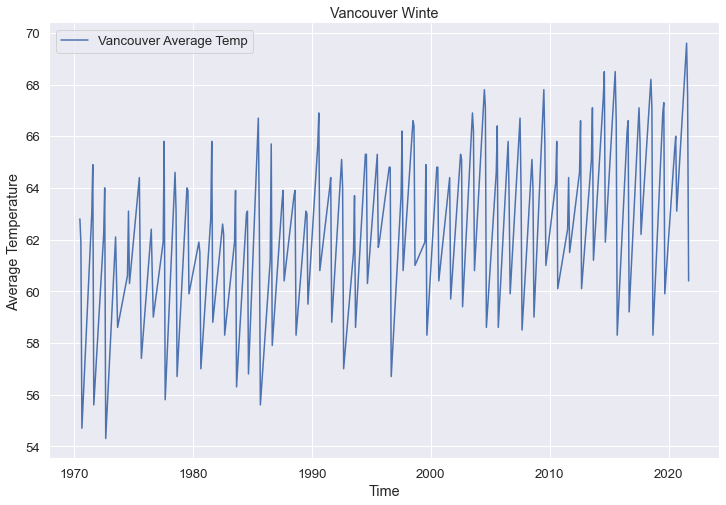

In [30]:
x = summer_vc_filled["time"]
y = summer_vc_filled["tavg"]
plt.xlabel("Time")
plt.ylabel("Average Temperature")
plt.plot(x,y);
# x = summer_pk_filled["time"]
# y = summer_pk_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.plot(x,y);
# x = summer_mx_filled["time"]
# y = summer_mx_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.title("Lahore vs Vancouver vs Aguascalientes Summer")
# plt.plot(x,y);
# plt.legend(['Vancouver, Canada','Lahore, Pakistan', "Aguascalientes, Mexico"]);

plt.title("Vancouver Summer")
plt.legend(['Vancouver Average Temp']);

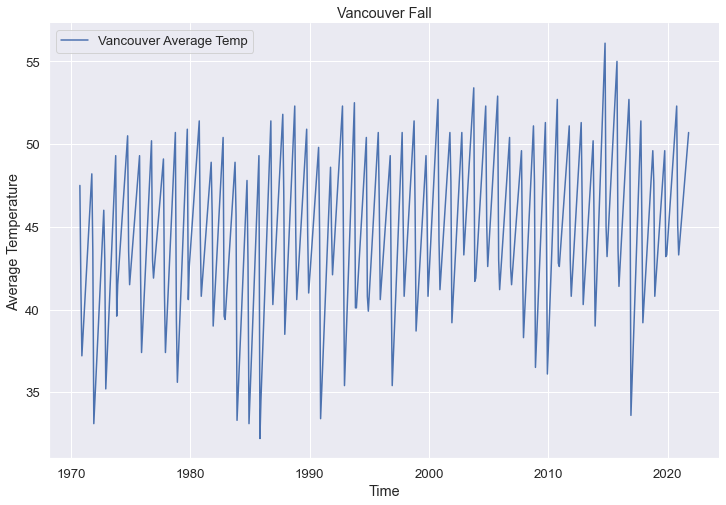

In [31]:
x = fall_vc_filled["time"]
y = fall_vc_filled["tavg"]
plt.xlabel("Time")
plt.ylabel("Average Temperature")
plt.plot(x,y);
# x = fall_pk_filled["time"]
# y = fall_pk_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.plot(x,y);
# x = fall_mx_filled["time"]
# y = fall_mx_filled["tavg"]
# plt.xlabel("Time")
# plt.ylabel("Average Temperature (F)")
# plt.title("Lahore vs Vancouver vs Aguascalientes Fall")
# plt.plot(x,y);
# plt.legend(['Vancouver, Canada','Lahore, Pakistan', "Aguascalientes, Mexico"]);

plt.title("Vancouver Fall")
plt.legend(['Vancouver Average Temp']);

In [230]:
fall_mx.head()

,time,tavg
1,1983-09-01,NaN
2,1983-10-01,28.9
3,1983-11-01,22.6
13,1984-09-01,40.5
14,1984-10-01,67.3


In [231]:
chicago = Point(41.8313,-87.6793)

In [232]:
stations = Stations()
stations = stations.nearby(41.8313,-87.6793)
station = stations.fetch(1)

In [233]:
data2 = Daily(chicago, start2, end2)
data2 = data2.normalize()
data2 = data2.interpolate()
data2 = data2.convert(units.imperial)
data2 = data2.fetch()

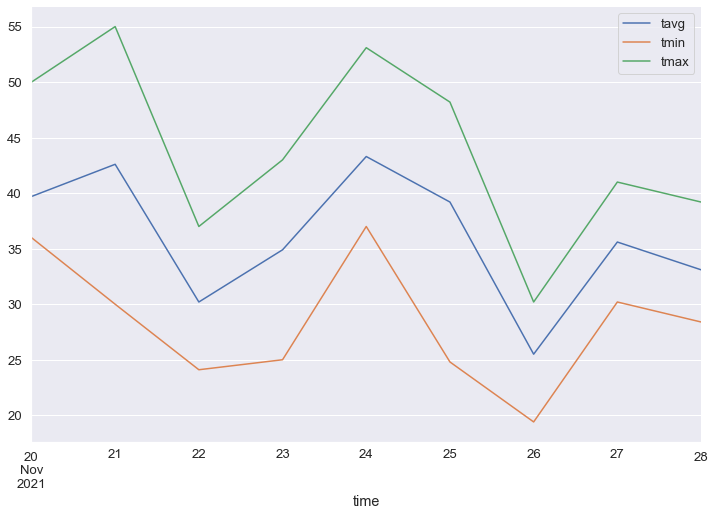

In [234]:
data2.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()